In [5]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data[:, [5,]]  # データセットの説明変数の中から、平均部屋数の列のみをXに代入
y = data.target

In [7]:
from sklearn.linear_model import LinearRegression
model_lir = LinearRegression()
model_lir.fit(X, y)
y_pred = model_lir.predict(X)

In [10]:
print(model_lir.coef_)  # 傾き
print(model_lir.intercept_)  # 切片

[9.10210898]
-34.67062077643857


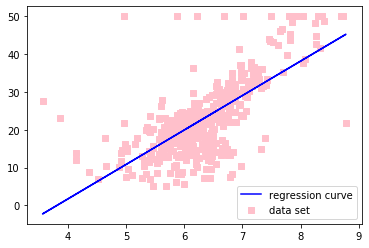

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X, y, color='pink', marker='s', label='data set')
ax.plot(X, y_pred, color='blue', label='regression curve')
ax.legend()
plt.show()

In [14]:
# 平均二乗誤差
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

43.60055177116956

In [16]:
# 決定係数：学習済みモデルの予測の当てはまり度を示す数値（最大1.0。1.0に近いほどモデルがデータ点をうまく説明できている）
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.48352545599133423

In [18]:
# SVRで回帰を行い、その結果を比較する
# SVR：サポートベクトルマシン（カーネル法）を回帰に応用したもの
from sklearn.svm import SVR
model_svr_linear = SVR(C=0.01, kernel='linear')
model_svr_linear.fit(X, y)
y_svr_pred = model_svr_linear.predict(X)

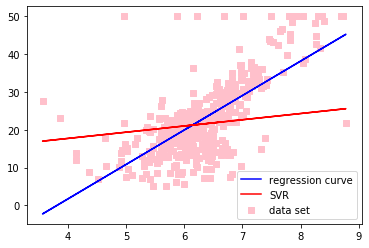

In [20]:
# LinearRegressionの結果とSVRの結果を合わせて確認
fig, ax = plt.subplots()
ax.scatter(X, y, color='pink', marker='s', label='data set')
ax.plot(X, y_pred, color='blue', label='regression curve')
ax.plot(X, y_svr_pred, color='red', label='SVR')
ax.legend()
plt.show()

In [23]:
# SVRの平均二乗誤差や決定係数の値を確認
print(mean_squared_error(y, y_svr_pred))  # 平均二乗誤差
print(r2_score(y, y_svr_pred))  # 決定係数
print(model_svr_linear.coef_)  # 傾き
print(model_svr_linear.intercept_)  # 切片

72.14197118147209
0.14543531775956597
[[1.64398]]
[11.13520958]


In [29]:
# SVRのハイパーパラメータを変更
model_svr_rbf = SVR(C=1.0, kernel='rbf')  # rbf: 非線形
model_svr_rbf.fit(X, y)
y_svr_pred = model_svr_rbf.predict(X)
print(mean_squared_error(y, y_svr_pred))  # 平均二乗誤差
print(r2_score(y, y_svr_pred))  # 決定係数

37.40032481992347
0.5569708427424378


In [33]:
# 過学習
train_X, test_X = X[:400], X[400:]
train_y, test_y = y[:400], y[400:]
model_svr_rbf_1 = SVR(C=1.0, kernel='rbf')
model_svr_rbf_1.fit(train_X, train_y)
test_y_pred = model_svr_rbf_1.predict(test_X)
print(mean_squared_error(test_y, test_y_pred))  # 平均二乗誤差（学習データに対する平均二乗誤差よりも値が大きい）
print(r2_score(test_y, test_y_pred))  # 決定係数（学習データに対する決定係数よりも値が小さい）

69.32813164021485
-1.4534559402985217
